In [412]:
import pandas as pd
import numpy as np
import math 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [325]:
binomial12 = pd.read_csv('Binomial12.csv')
binomial12 = binomial12.append(pd.Series([np.NaN, np.NaN, np.NaN], index=['Binomial', 'Normal', 'Uniform']), ignore_index = True)
# binomial12 our given csv file in dataframe format
# we appended a row of NaN values in order to make our clean_Series function work

In [326]:
binomial_variance = .81
Binomial = pd.Series(binomial12['Binomial']) # Separate the distributions  
Normal = pd.Series(binomial12['Normal'])     # into their own series
Uniform = pd.Series(binomial12['Uniform'])

Here I create a function to clean up the series we end up with from this dataset:

In [327]:
def clean_Series(ser):
    last_val = 0
    for i in range(2, ser.size):
        if pd.isnull(ser[i]):
            last_val = i
            break
    ser = (pd.Series(data = ser[2:last_val].values)).apply(int)
    return ser

In [328]:
Binomial = clean_Series(Binomial)
Normal = clean_Series(Normal)
Uniform = clean_Series(Uniform)

# Part A

## A.1

#### For the type of distribution presented in the first column, plot a histogram (normalized to unit area) of the data.

Our distribution is binomial, so we must create the appropriate histogram

1: Find our range for the dataset

In [329]:
a = Binomial.min()
a # our minimum

0

In [330]:
b = Binomial.max()
b # our maximum

5

Now, Dr. Kleinhenz suggested we intially try shifting a and b such that a < eXi < b, so we will extend the range by 1

In [331]:
a -=.5
b += .5

In [332]:
a

-0.5

In [333]:
b

5.5

2: we must select a width, w, and a number of bins, n such that: nw = b - a
for a dataset of all integers, we typically pick w to be 1

In [334]:
w = 1

In [335]:
n = (b - a) / w
n

6.0

3: Each data point Xi can be represented as follows:

Xi = a + kw + ew

where *a* is the left edge of the interval, *w* is the bin width, *k* is the number of whole bins between *a* and *Xi*, and 0 <= ew <= w with 0 <= e <= 1 is a fraction of a bin.

divide the equation by *w* to get:

*(Xi - a)/w = k + e*

Since 0 <= e <= 1 and k is an integer it must be that

*k* = [ *(Xi - a)/w* ]

In [336]:
k = ((Binomial - a) / w).apply(math.floor)
# k is our number of whole bins between between a and Xi

In [337]:
BinomialDF = pd.DataFrame(Binomial, columns = ['Binomial'])
BinomialDF['k'] = k
# BinomialDF is our DataFrame containing the original Binomial dataset and our 
# new k values

4: Each time Xi falls into some bin k, we must place a rectangle over the bin base that has a height *h* and width *w* (same as bin width)

The total area under all such rectangles is A = whN 

where N is the total number of sample points

we normalize A = 1 to set h

h = 1 / (wN)

In [338]:
N = Binomial.size
N

1200

In [339]:
h = 1 / (w * N)
h

0.0008333333333333334

In [365]:
BinomialDF['Histogram'] = pd.Series(BinomialDF['k'].value_counts())
# BinomialDF with a Histogram column

In [475]:
BinomialDF['Histogram Normalized to Unit Area'] = pd.Series(
    BinomialDF['Histogram'] * h)
# BinomialDF with our Histogram normalized

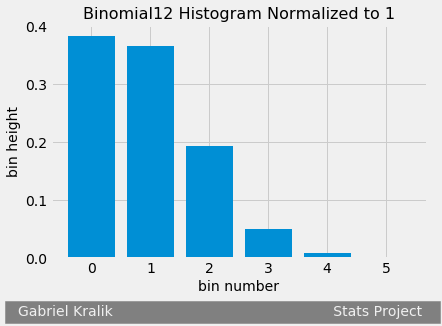

In [470]:
y = np.array(BinomialDF['Histogram Normalized to Unit Area'][0:6])
y
x = [0,1,2,3,4,5]
import matplotlib.style as style
style.use('fivethirtyeight')
plt.bar(x,y)
plt.xlabel('bin number', fontsize=14)
plt.ylabel('bin height', fontsize=14)
plt.title('Binomial12 Histogram Normalized to 1', fontsize=16)
plt.text(x = -1.4, y=-.1, s='  Gabriel Kralik                                                 Stats Project   '   ,
         fontsize=14, color='#f0f0f0', backgroundcolor='grey')
plt.show()

## A.2

Estimate the mean and the variance for the column A distribution. For comparison, the
exact variance is given in the cell labelled (here) Distribution Variance.

In [474]:
mu_est = Binomial.mean()
mu_est # our mean

0.93583333333333329

In [473]:
var_est = Binomial.var()
var_est

0.85409438420906325

## A.3

The distributin found in the first column depends on two parameters as follows:

Binomial Distribution : *n* and *p*

Estimate the two parameters and determine a 96% confidence interval around each parameter